# Macroeconomic and Business Climate Overview

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import openpyxl

from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

### We work with World Economic Outlook (IMF) and World Bank Databases

In [2]:
# Getting Data Sets - IMF and WB
folder_path = 'data/'
file_name_1 = 'imf_data.xlsx'
file_name_2 = 'wb_data.xlsx'
file_path_1 = folder_path + file_name_1
file_path_2 = folder_path + file_name_2
df_imf = pd.read_excel(file_path_1, decimal='.')
df_wb = pd.read_excel(file_path_2, decimal='.')

### Initial inspection of WB data and cleaning of the data

In [3]:
df_wb.head()

,year,Account ownership at a financial institution or with a mobile-money-service provider (% of population ages 15+) [FX.OWN.TOTL.ZS],"Account ownership at a financial institution or with a mobile-money-service provider, female (% of population ages 15+) [FX.OWN.TOTL.FE.ZS]","Account ownership at a financial institution or with a mobile-money-service provider, male (% of population ages 15+) [FX.OWN.TOTL.MA.ZS]","Account ownership at a financial institution or with a mobile-money-service provider, older adults (% of population ages 25+) [FX.OWN.TOTL.OL.ZS]","Account ownership at a financial institution or with a mobile-money-service provider, poorest 40% (% of population ages 15+) [FX.OWN.TOTL.40.ZS]","Account ownership at a financial institution or with a mobile-money-service provider, primary education or less (% of population ages 15+) [FX.OWN.TOTL.PL.ZS]","Account ownership at a financial institution or with a mobile-money-service provider, richest 60% (% of population ages 15+) [FX.OWN.TOTL.60.ZS]","Account ownership at a financial institution or with a mobile-money-service provider, secondary education or more (% of population ages 15+) [FX.OWN.TOTL.SO.ZS]","Account ownership at a financial institution or with a mobile-money-service provider, young adults (% of population ages 15-24) [FX.OWN.TOTL.YG.ZS]",...,Travel services (% of commercial service imports) [TM.VAL.TRVL.ZS.WT],"Travel services (% of service exports, BoP) [BX.GSR.TRVL.ZS]","Travel services (% of service imports, BoP) [BM.GSR.TRVL.ZS]","Use of IMF credit (DOD, current US$) [DT.DOD.DIMF.CD]",Voice and Accountability: Estimate [VA.EST],Voice and Accountability: Number of Sources [VA.NO.SRC],Voice and Accountability: Percentile Rank [VA.PER.RNK],"Voice and Accountability: Percentile Rank, Lower Bound of 90% Confidence Interval [VA.PER.RNK.LOWER]","Voice and Accountability: Percentile Rank, Upper Bound of 90% Confidence Interval [VA.PER.RNK.UPPER]",Voice and Accountability: Standard Error [VA.STD.ERR]
0,2003,..,..,..,..,..,..,..,..,..,...,26.745,60.718,23.919,446462658.500,-0.634,11,29.851,23.881,38.308,0.156
1,2004,..,..,..,..,..,..,..,..,..,...,26.559,62.853,24.412,363961870.600,-0.550,13,31.731,25,38.942,0.142
2,2005,..,..,..,..,..,..,..,..,..,...,23.741,59.717,23.021,260391555,-0.514,14,32.212,24.519,40.385,0.143
3,2006,..,..,..,..,..,..,..,..,..,...,29.325,68.750,28.174,183688744.400,-0.717,16,27.885,23.077,31.250,0.116
4,2007,..,..,..,..,..,..,..,..,..,...,26.300,63.201,25.094,114245754.100,-0.677,17,28.846,24.519,32.692,0.113


In [4]:
# changes in column names and introducing na instead of ..
df_wb.columns = df_wb.columns.str.lower()   
df_wb.columns = df_wb.columns.str.replace(r'[^a-zA-Z0-9_%]', '_', regex=True)
df_wb.columns = [col.rstrip('_') for col in df_wb.columns]
df_wb['year'] = pd.to_datetime(df_wb['year'], format='%Y')
df_wb['year'] = df_wb['year'].dt.year
df_wb = df_wb.replace('..', 'na')

In [5]:
df_wb.head()

,year,account_ownership_at_a_financial_institution_or_with_a_mobile_money_service_provider__%_of_population_ages_15____fx_own_totl_zs,account_ownership_at_a_financial_institution_or_with_a_mobile_money_service_provider__female__%_of_population_ages_15____fx_own_totl_fe_zs,account_ownership_at_a_financial_institution_or_with_a_mobile_money_service_provider__male__%_of_population_ages_15____fx_own_totl_ma_zs,account_ownership_at_a_financial_institution_or_with_a_mobile_money_service_provider__older_adults__%_of_population_ages_25____fx_own_totl_ol_zs,account_ownership_at_a_financial_institution_or_with_a_mobile_money_service_provider__poorest_40%__%_of_population_ages_15____fx_own_totl_40_zs,account_ownership_at_a_financial_institution_or_with_a_mobile_money_service_provider__primary_education_or_less__%_of_population_ages_15____fx_own_totl_pl_zs,account_ownership_at_a_financial_institution_or_with_a_mobile_money_service_provider__richest_60%__%_of_population_ages_15____fx_own_totl_60_zs,account_ownership_at_a_financial_institution_or_with_a_mobile_money_service_provider__secondary_education_or_more__%_of_population_ages_15____fx_own_totl_so_zs,account_ownership_at_a_financial_institution_or_with_a_mobile_money_service_provider__young_adults__%_of_population_ages_15_24___fx_own_totl_yg_zs,...,travel_services__%_of_commercial_service_imports___tm_val_trvl_zs_wt,travel_services__%_of_service_exports__bop___bx_gsr_trvl_zs,travel_services__%_of_service_imports__bop___bm_gsr_trvl_zs,use_of_imf_credit__dod__current_us____dt_dod_dimf_cd,voice_and_accountability__estimate__va_est,voice_and_accountability__number_of_sources__va_no_src,voice_and_accountability__percentile_rank__va_per_rnk,voice_and_accountability__percentile_rank__lower_bound_of_90%_confidence_interval__va_per_rnk_lower,voice_and_accountability__percentile_rank__upper_bound_of_90%_confidence_interval__va_per_rnk_upper,voice_and_accountability__standard_error__va_std_err
0,2003,na,na,na,na,na,na,na,na,na,...,26.745,60.718,23.919,446462658.500,-0.634,11,29.851,23.881,38.308,0.156
1,2004,na,na,na,na,na,na,na,na,na,...,26.559,62.853,24.412,363961870.600,-0.550,13,31.731,25,38.942,0.142
2,2005,na,na,na,na,na,na,na,na,na,...,23.741,59.717,23.021,260391555,-0.514,14,32.212,24.519,40.385,0.143
3,2006,na,na,na,na,na,na,na,na,na,...,29.325,68.750,28.174,183688744.400,-0.717,16,27.885,23.077,31.250,0.116
4,2007,na,na,na,na,na,na,na,na,na,...,26.300,63.201,25.094,114245754.100,-0.677,17,28.846,24.519,32.692,0.113


### Initial inspection of IMF data and cleaning of the data

In [6]:
df_imf.head(8)

,time,gdp_constant_prices_nc_bln,gdp_constant_prices_percent,gdp_current_prices_nc_bln,gdp_current_prices_usd_bln,gdp_current_prices_ppp_bln,gdp_deflator,gdp_per_capita_constant_prices_nc,gdp_per_capita_constant_prices_ppp_2017usd,gdp_per_capita_current_prices_nc,...,general_government_structural_balance_percent_of_gdp,general_government_primary_net_lending_borrowing_nc_bln,general_government_primary_net_lending_borrowing_percent_of_gdp,general_government_net_debt_nc_bln,general_government_net_debt_percent_of_gdp,general_government_gross_debt_nc_bln,general_government_gross_debt_percent_of_gdp,gdp_corresponding_to_fiscal_year_current_prices_nc_bln,current_account_balance_usd_bln,current_account_balance_percent_of_gdp
0,2003,15.182,3.980,7.498,10.575,36.925,49.387,2793.828,9468.427,1379.794,...,-1.402,0.060,0.800,6.546,87.302,6.657,88.788,7.498,1.199,11.334
1,2004,16.435,8.257,8.346,11.771,41.048,50.778,2945.276,9981.693,1495.548,...,-0.415,0.119,1.430,6.555,78.544,6.804,81.525,8.346,0.039,0.332
2,2005,17.885,8.822,9.312,13.134,46.070,52.064,3102.059,10513.037,1615.058,...,-6.217,-0.252,-2.709,6.763,72.626,6.794,72.959,9.312,-2.272,-17.298
3,2006,19.408,8.515,11.199,15.795,51.535,57.701,3239.287,10978.111,1869.112,...,-5.349,-0.129,-1.153,6.627,59.178,7.425,66.304,11.199,-1.726,-10.928
4,2007,21.033,8.373,12.731,17.957,57.360,60.529,3362.496,11395.674,2035.279,...,-6.699,-0.296,-2.324,7.431,58.369,8.180,64.252,12.731,-2.874,-16.007
5,2008,22.586,7.383,16.080,22.648,62.776,71.194,3444.881,11674.880,2452.559,...,-6.253,-0.412,-2.562,8.473,52.691,8.722,54.240,16.080,-2.055,-9.075
6,2009,23.721,5.024,17.422,24.538,66.352,73.445,3441.180,11662.336,2527.381,...,-11.140,-1.164,-6.683,9.715,55.765,10.099,57.965,17.422,-1.245,-5.075
7,2010,24.270,2.315,19.265,27.134,68.704,79.378,3342.271,11327.130,2653.018,...,-6.592,-1.120,-5.814,11.071,57.465,11.451,59.437,19.265,-1.885,-6.946


In [7]:
df_imf.tail()

,time,gdp_constant_prices_nc_bln,gdp_constant_prices_percent,gdp_current_prices_nc_bln,gdp_current_prices_usd_bln,gdp_current_prices_ppp_bln,gdp_deflator,gdp_per_capita_constant_prices_nc,gdp_per_capita_constant_prices_ppp_2017usd,gdp_per_capita_current_prices_nc,...,general_government_structural_balance_percent_of_gdp,general_government_primary_net_lending_borrowing_nc_bln,general_government_primary_net_lending_borrowing_percent_of_gdp,general_government_net_debt_nc_bln,general_government_net_debt_percent_of_gdp,general_government_gross_debt_nc_bln,general_government_gross_debt_percent_of_gdp,gdp_corresponding_to_fiscal_year_current_prices_nc_bln,current_account_balance_usd_bln,current_account_balance_percent_of_gdp
21,2024,32.699,2.700,37.333,52.656,138.732,114.174,3168.207,10737.217,3617.273,...,-4.337,-0.627,-1.679,34.077,91.277,34.307,91.893,37.333,-2.861,-5.434
22,2025,33.680,3.000,39.415,55.592,145.774,117.028,3257.262,11039.029,3811.924,...,-4.151,0.139,0.352,35.058,88.947,35.288,89.531,39.415,-2.229,-4.009
23,2026,34.690,3.000,41.612,58.691,153.061,119.954,3343.601,11331.638,4010.790,...,-3.605,0.478,1.149,35.651,85.675,35.882,86.229,41.612,-1.761,-3.001
24,2027,35.731,3.000,43.932,61.963,160.535,122.953,3427.089,11614.581,4213.710,...,-3.414,0.844,1.921,36.023,81.997,36.253,82.521,43.932,-2.012,-3.248
25,2028,36.803,3.000,46.381,65.418,168.415,126.027,3453.915,11705.498,4352.862,...,-3.261,0.844,1.820,37.223,80.254,37.453,80.751,46.381,-2.347,-3.587


In [8]:
df_imf.rename(columns={'time': 'year'}, inplace=True)

In [9]:
df_imf['year'] = pd.to_datetime(df_imf['year'], format='%Y')
df_imf['year'] = df_imf['year'].dt.year

## Exploratory Data Analysis with the IMF data

In [10]:
df_wb.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
year,20.000,2012.500,5.916,2003.000,2007.750,2012.500,2017.250,2022.000
agricultural_raw_materials_exports__%_of_merchandise_exports___tx_val_agri_zs_un,20.000,0.326,0.200,0.162,0.214,0.281,0.353,1.103
agricultural_raw_materials_imports__%_of_merchandise_imports___tm_val_agri_zs_un,20.000,1.217,0.145,1.020,1.103,1.180,1.295,1.610
agriculture__forestry__and_fishing__value_added__%_of_gdp___nv_agr_totl_zs,20.000,3.645,0.822,2.467,2.848,3.579,4.405,4.668
agriculture__forestry__and_fishing__value_added__annual_%_growth___nv_agr_totl_kd_zg,20.000,6.060,10.399,-9.351,1.259,3.569,8.461,43.558
...,...,...,...,...,...,...,...,...
services__value_added__current_lcu___nv_srv_totl_cn,20.000,13340426025.000,5363231525.414,4663000000.000,9005129500.000,14158418200.000,18031103450.000,20614967200.000
services__value_added__current_us____nv_srv_totl_cd,20.000,18792639699.678,7549426644.457,6576868829.337,12691778136.334,19941434084.507,25395920352.113,29035165070.423
taxes_less_subsidies_on_products__constant_lcu___ny_tax_nind_kn,20.000,3190417640.000,541871503.082,1974277200.000,2893235350.000,3404461150.000,3560660450.000,3727665300.000
taxes_less_subsidies_on_products__current_lcu___ny_tax_nind_cn,20.000,2807815220.000,1224779218.267,895700000.000,1693299675.000,3098879850.000,3930683025.000,4266404300.000


In [11]:
df_imf.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
year,26.000,2015.500,7.649,2003.000,2009.250,2015.500,2021.750,2028.000
gdp_constant_prices_nc_bln,26.000,27.133,5.866,15.182,23.858,28.047,30.843,36.803
gdp_constant_prices_percent,26.000,3.649,2.545,-1.607,2.440,2.719,3.831,8.822
gdp_current_prices_nc_bln,26.000,26.321,11.235,7.498,17.883,27.861,33.276,46.381
gdp_current_prices_usd_bln,26.000,37.119,15.850,10.575,25.187,39.296,46.934,65.418
gdp_current_prices_ppp_bln,26.000,94.837,38.159,36.925,66.940,88.977,121.437,168.415
gdp_deflator,26.000,92.165,23.533,49.387,74.928,99.328,107.877,126.027
gdp_per_capita_constant_prices_nc,26.000,3141.246,195.628,2793.828,2971.229,3094.764,3321.019,3453.915
gdp_per_capita_constant_prices_ppp_2017usd,26.000,10645.847,662.993,9468.427,10069.649,10488.316,11255.105,11705.498
gdp_per_capita_current_prices_nc,26.000,2898.868,779.979,1379.794,2558.790,2960.510,3234.966,4352.862


# Macroeconomic Overview

/var/folders/qz/5gqy7l_x781bw95tpvxd2x2c0000gp/T/ipykernel_11412/196591038.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


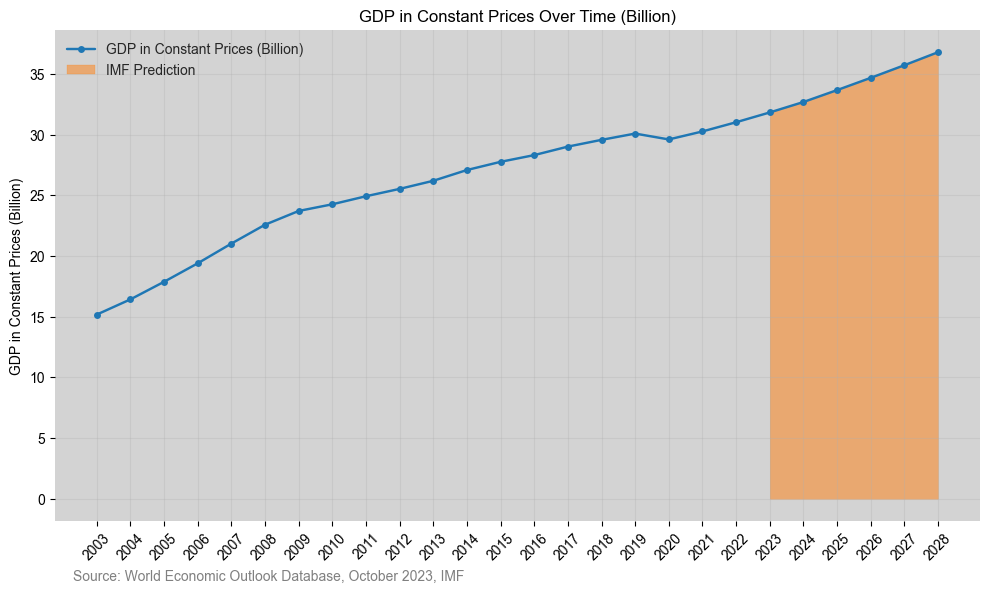

In [12]:
# GDP in constand prices (bln)
fig, ax = plt.subplots(figsize=(10, 6))

plt.gca().set_facecolor('lightgray')
plt.style.use('seaborn')


years = df_imf['year']  
gdp_data = df_imf['gdp_constant_prices_nc_bln']

ax.plot(years, gdp_data, label='GDP in Constant Prices (Billion)', marker='o', markersize=5, linestyle='-', color='tab:blue')

prediction_years = (years >= 2023) & (years <= 2028)  
ax.fill_between(years[prediction_years], gdp_data[prediction_years], color='tab:orange', label='IMF Prediction', alpha=0.5)


ax.set_xlabel('')
ax.set_ylabel('GDP in Constant Prices (Billion)')
ax.set_title('GDP in Constant Prices Over Time (Billion)')
ax.legend()

ax.set_xticks(years[::1])
plt.xticks(rotation=45)

source_text = 'Source: World Economic Outlook Database, October 2023, IMF'
plt.text(0.02, -0.12, source_text, transform=ax.transAxes, fontsize=10, color='gray')

for spine in ax.spines.values():
    spine.set_visible(False)

ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

/var/folders/qz/5gqy7l_x781bw95tpvxd2x2c0000gp/T/ipykernel_11412/544878288.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


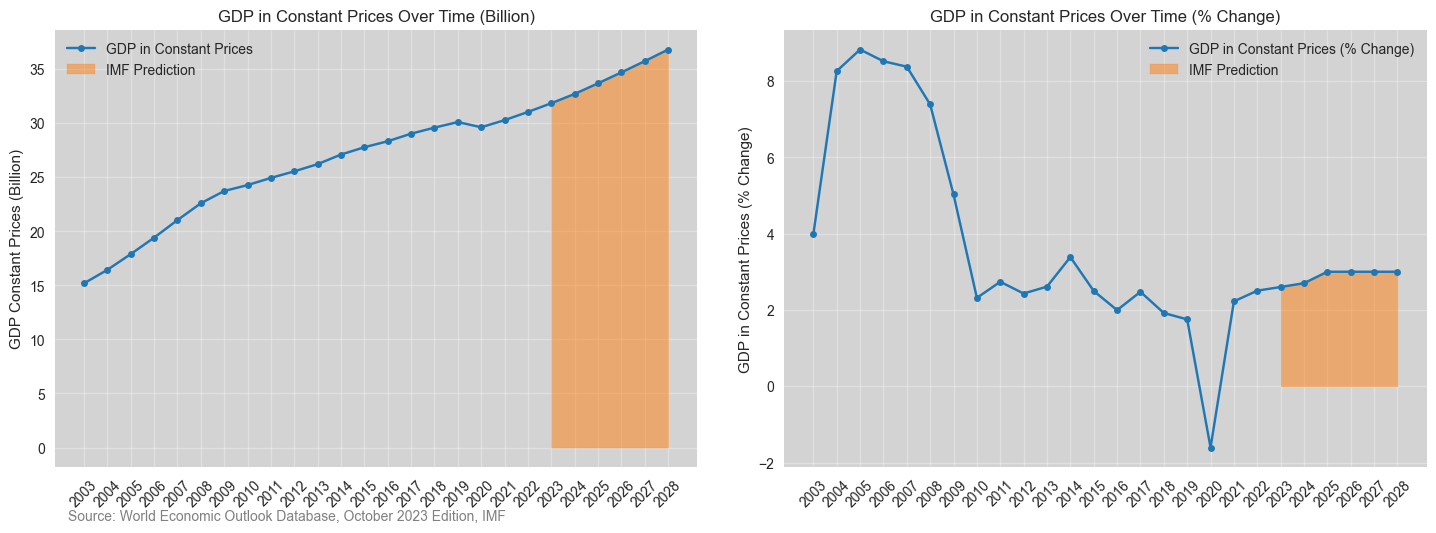

In [13]:
# GDP in constant prices and real growth rate
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.set_facecolor('lightgray')
ax2.set_facecolor('lightgray')

plt.style.use('seaborn')

years = df_imf['year']  


prediction_years = (years >= 2023) & (years <= 2028)  

gdp_data1 = df_imf['gdp_constant_prices_nc_bln']
ax1.plot(years, gdp_data1, label='GDP in Constant Prices', marker='o', markersize=5, linestyle='-', color='tab:blue')
ax1.fill_between(years[prediction_years], gdp_data1[prediction_years], color='tab:orange', label='IMF Prediction', alpha=0.5)
ax1.set_xlabel('')
ax1.set_ylabel('GDP Constant Prices (Billion)')
ax1.set_title('GDP in Constant Prices Over Time (Billion)')
ax1.legend()
ax1.set_xticks(years[::1])
plt.sca(ax1)  
plt.xticks(rotation=45)
source_text1 = 'Source: World Economic Outlook Database, October 2023 Edition, IMF'
plt.text(0.02, -0.12, source_text1, transform=ax1.transAxes, fontsize=10, color='gray')



gdp_data2 = df_imf['gdp_constant_prices_percent']
ax2.plot(years, gdp_data2, label='GDP in Constant Prices (% Change)', marker='o', markersize=5, linestyle='-', color='tab:blue')
ax2.fill_between(years[prediction_years], gdp_data2[prediction_years], color='tab:orange', label='IMF Prediction', alpha=0.5)
ax2.set_xlabel('')
ax2.set_ylabel('GDP in Constant Prices (% Change)')
ax2.set_title('GDP in Constant Prices Over Time (% Change)')
ax2.legend()
ax2.set_xticks(years[::1])
plt.sca(ax2)  
plt.xticks(rotation=45)

ax1.grid(alpha=0.3)
ax2.grid(alpha=0.3)


plt.tight_layout(pad=3.0)
plt.show()


/var/folders/qz/5gqy7l_x781bw95tpvxd2x2c0000gp/T/ipykernel_11412/2619034091.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


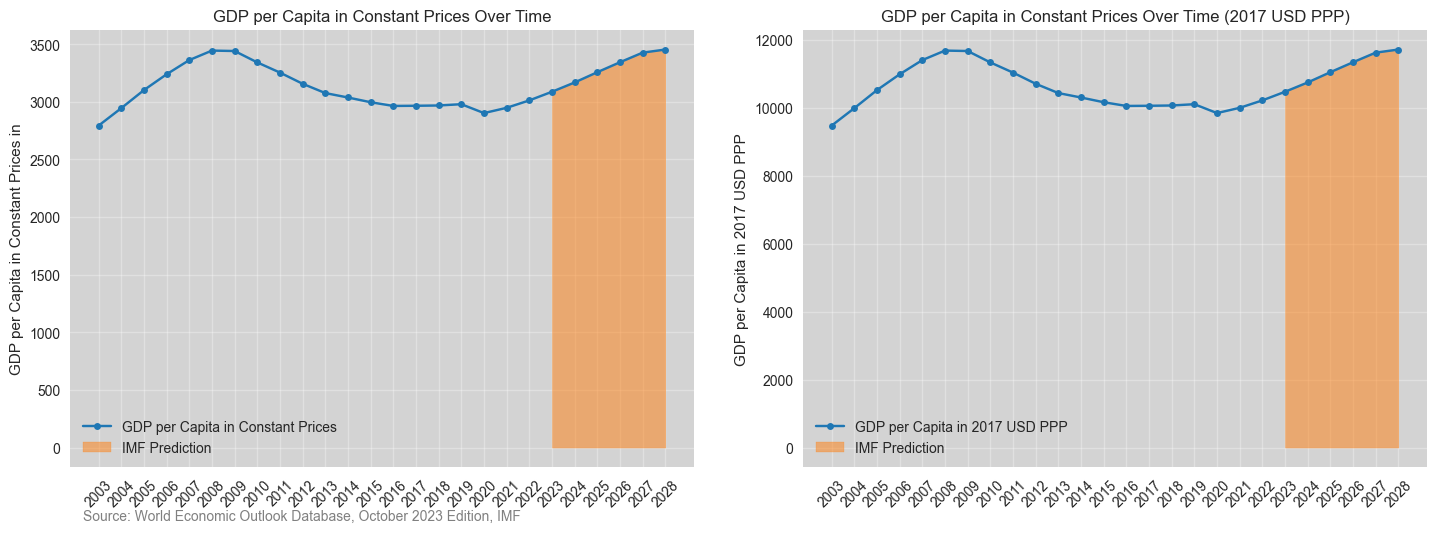

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.set_facecolor('lightgray')
ax2.set_facecolor('lightgray')

plt.style.use('seaborn')

years = df_imf['year']

prediction_years = (years >= 2023) & (years <= 2028)

gdp_per_capita_nc = df_imf['gdp_per_capita_constant_prices_nc']
ax1.plot(years, gdp_per_capita_nc, label='GDP per Capita in Constant Prices', marker='o', markersize=5, linestyle='-', color='tab:blue')
ax1.fill_between(years[prediction_years], gdp_per_capita_nc[prediction_years], color='tab:orange', label='IMF Prediction', alpha=0.5)
ax1.set_xlabel('')
ax1.set_ylabel('GDP per Capita in Constant Prices in')
ax1.set_title('GDP per Capita in Constant Prices Over Time')
ax1.legend()
ax1.set_xticks(years[::1])
plt.sca(ax1)
plt.xticks(rotation=45)
source_text1 = 'Source: World Economic Outlook Database, October 2023 Edition, IMF'
plt.text(0.02, -0.12, source_text1, transform=ax1.transAxes, fontsize=10, color='gray')


gdp_per_capita_ppp = df_imf['gdp_per_capita_constant_prices_ppp_2017usd']
ax2.plot(years, gdp_per_capita_ppp, label='GDP per Capita in 2017 USD PPP', marker='o', markersize=5, linestyle='-', color='tab:blue')
ax2.fill_between(years[prediction_years], gdp_per_capita_ppp[prediction_years], color='tab:orange', label='IMF Prediction', alpha=0.5)
ax2.set_xlabel('')
ax2.set_ylabel('GDP per Capita in 2017 USD PPP')
ax2.set_title('GDP per Capita in Constant Prices Over Time (2017 USD PPP)')
ax2.legend()
ax2.set_xticks(years[::1])
plt.sca(ax2)
plt.xticks(rotation=45)


ax1.grid(alpha=0.3)
ax2.grid(alpha=0.3)

plt.tight_layout(pad=3.0)
plt.show()


/var/folders/qz/5gqy7l_x781bw95tpvxd2x2c0000gp/T/ipykernel_11412/1801998215.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


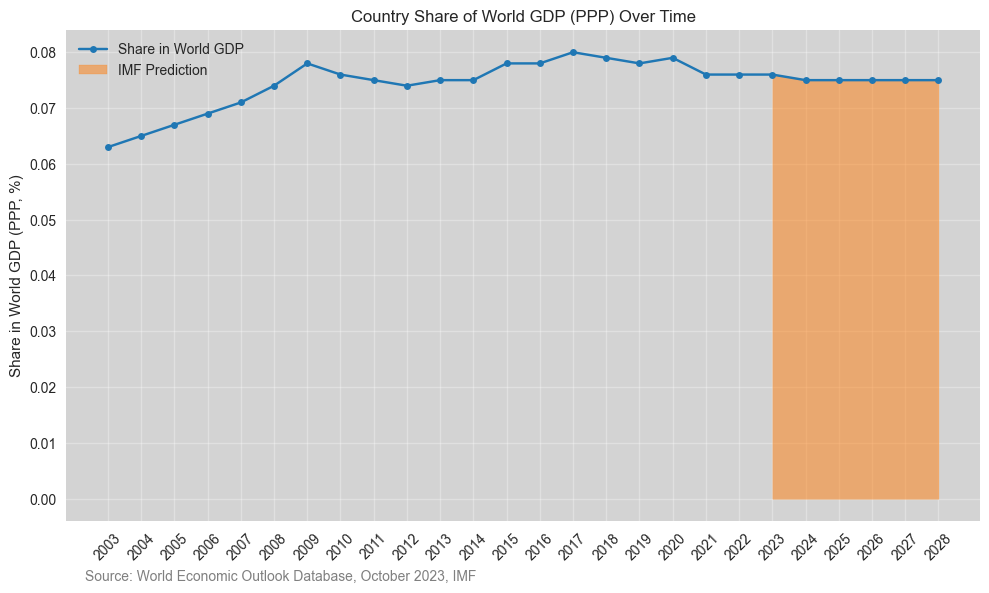

In [15]:
# GDP based on PPP share of world total
fig, ax = plt.subplots(figsize=(10, 6))

ax.set_facecolor('lightgray')
plt.style.use('seaborn')

years = df_imf['year']
gdp_ppp_share = df_imf['gdp_ppp_share_world_total']

ax.plot(years, gdp_ppp_share, label="Share in World GDP", marker='o', markersize=5, linestyle='-', color='tab:blue')

prediction_years = (years >= 2023) & (years <= 2028)
ax.fill_between(years[prediction_years], gdp_ppp_share[prediction_years], color='tab:orange', label='IMF Prediction', alpha=0.5)

ax.set_xlabel('')
ax.set_ylabel("Share in World GDP (PPP, %)")
ax.set_title("Country Share of World GDP (PPP) Over Time")
ax.legend()

ax.set_xticks(years[::1])
plt.xticks(rotation=45)

source_text = 'Source: World Economic Outlook Database, October 2023, IMF'
plt.text(0.02, -0.12, source_text, transform=ax.transAxes, fontsize=10, color='gray')

for spine in ax.spines.values():
    spine.set_visible(False)

ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

/var/folders/qz/5gqy7l_x781bw95tpvxd2x2c0000gp/T/ipykernel_11412/3442487130.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


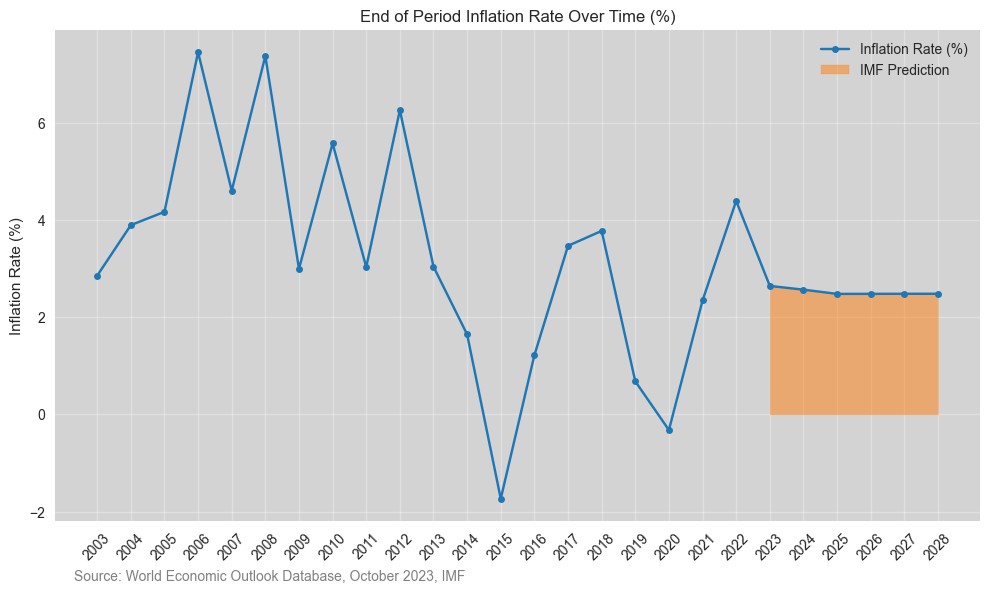

In [16]:
# Inflation end of period percentage change


fig, ax = plt.subplots(figsize=(10, 6))

plt.gca().set_facecolor('lightgray')
plt.style.use('seaborn')

years = df_imf['year']  
inflation_data = df_imf['inflation_end_of_period_consumer_prices_percent']

ax.plot(years, inflation_data, label='Inflation Rate (%)', marker='o', markersize=5, linestyle='-', color='tab:blue')

prediction_years = (years >= 2023) & (years <= 2028)  
ax.fill_between(years[prediction_years], inflation_data[prediction_years], color='tab:orange', label='IMF Prediction', alpha=0.5)

ax.set_xlabel('')
ax.set_ylabel('Inflation Rate (%)')
ax.set_title('End of Period Inflation Rate Over Time (%)')

ax.legend()

ax.set_xticks(years[::1])
plt.xticks(rotation=45)

source_text = 'Source: World Economic Outlook Database, October 2023, IMF'
plt.text(0.02, -0.12, source_text, transform=ax.transAxes, fontsize=10, color='gray')

for spine in ax.spines.values():
    spine.set_visible(False)

ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()


/var/folders/qz/5gqy7l_x781bw95tpvxd2x2c0000gp/T/ipykernel_11412/3758919482.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


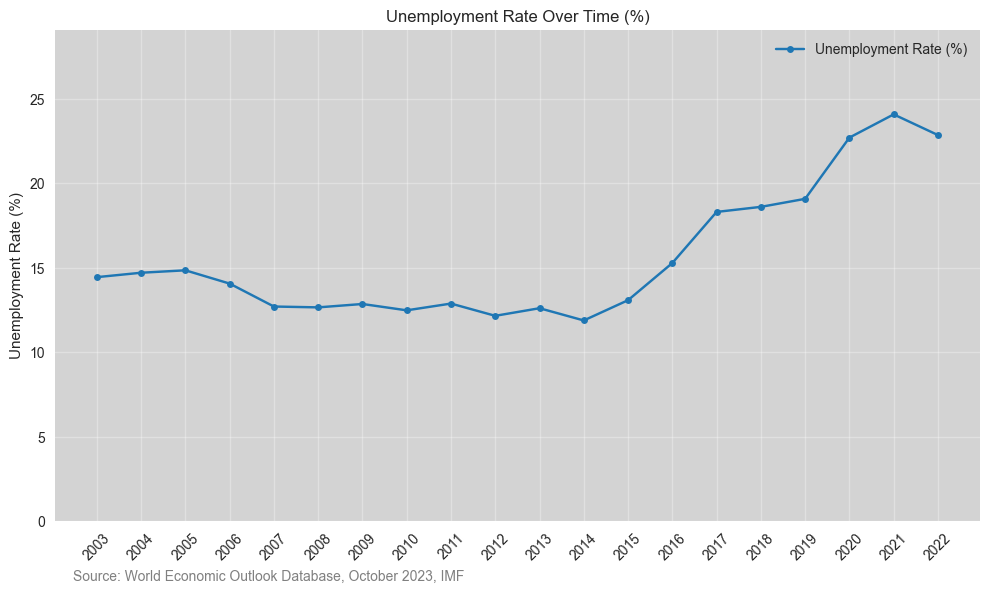

In [17]:
fig, ax = plt.subplots(figsize=(10, 6))

plt.gca().set_facecolor('lightgray')
plt.style.use('seaborn')


years = df_imf['year']  
unemployment_data = df_imf['unemployment_rate_share_in_labor_force']
data_available = ~unemployment_data.isnull()
years = years[data_available]
unemployment_data = unemployment_data[data_available]

ax.plot(years, unemployment_data, label='Unemployment Rate (%)', marker='o', markersize=5, linestyle='-', color='tab:blue')

ax.set_xlabel('')
ax.set_ylabel('Unemployment Rate (%)')
ax.set_title('Unemployment Rate Over Time (%)')

ax.legend()

ax.set_ylim(0, max(unemployment_data) + 5)  

ax.set_xticks(years[::1])
plt.xticks(rotation=45)

source_text = 'Source: World Economic Outlook Database, October 2023, IMF'
plt.text(0.02, -0.12, source_text, transform=ax.transAxes, fontsize=10, color='gray')

for spine in ax.spines.values():
    spine.set_visible(False)

ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

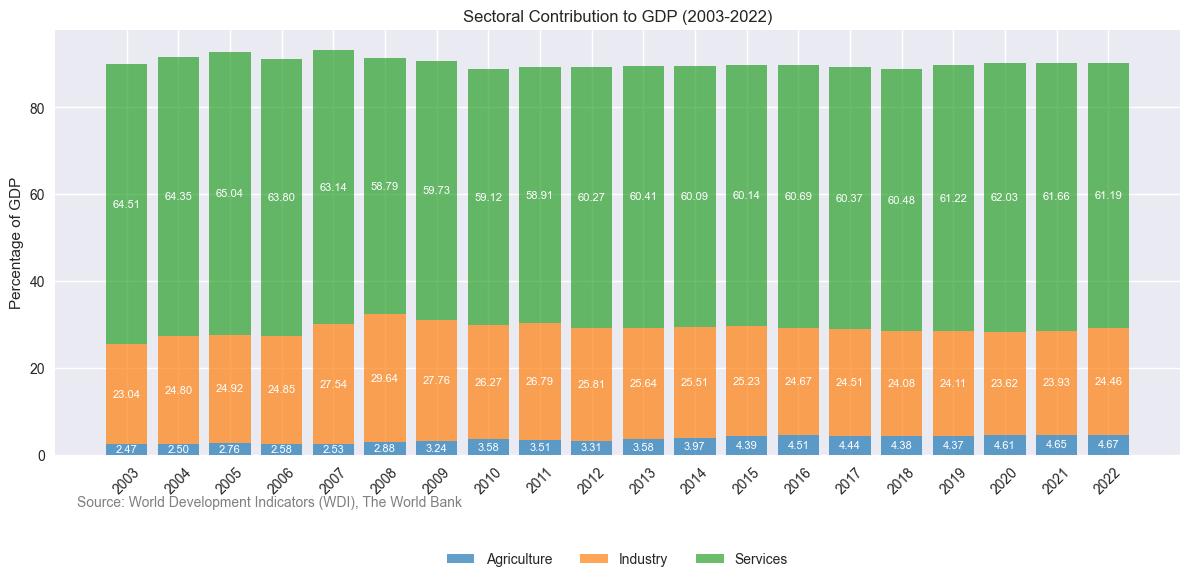

In [18]:
# Sectors contribution to GDP
agriculture_col = 'agriculture__forestry__and_fishing__value_added__%_of_gdp___nv_agr_totl_zs'
industry_col = 'industry__including_construction___value_added__%_of_gdp___nv_ind_totl_zs'
services_col = 'services__value_added__%_of_gdp___nv_srv_totl_zs'



years = list(range(2003, 2023))
data = df_wb.loc[df_wb['year'].isin(years), ['year', agriculture_col, industry_col, services_col]]

colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  


plt.figure(figsize=(12, 6))
ax.set_facecolor('lightgray')

bottom_agriculture = [0] * len(years)
bottom_industry = [0] * len(years)

for sector, color in zip([agriculture_col, industry_col, services_col], colors):
    plt.bar(data['year'], data[sector], bottom=bottom_agriculture, label=sector, alpha=0.7, color=color)
    
    
    for year, val in zip(years, data[sector]):
        plt.text(year, bottom_agriculture[year - 2003] + val / 2, f'{val:.2f}', ha='center', va='center', fontsize=8, color='white')
        bottom_agriculture[year - 2003] += val

plt.xlabel('')
plt.ylabel('Percentage of GDP')
plt.title('Sectoral Contribution to GDP (2003-2022)')


plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), labels=['Agriculture', 'Industry', 'Services'], ncol=3)


source_text = 'Source: World Development Indicators (WDI), The World Bank'
plt.text(0.02, -0.12, source_text, transform=plt.gca().transAxes, fontsize=10, color='gray')

plt.xticks(years, rotation=45)
ax.grid(alpha=0.3)
plt.tight_layout()
plt.show()


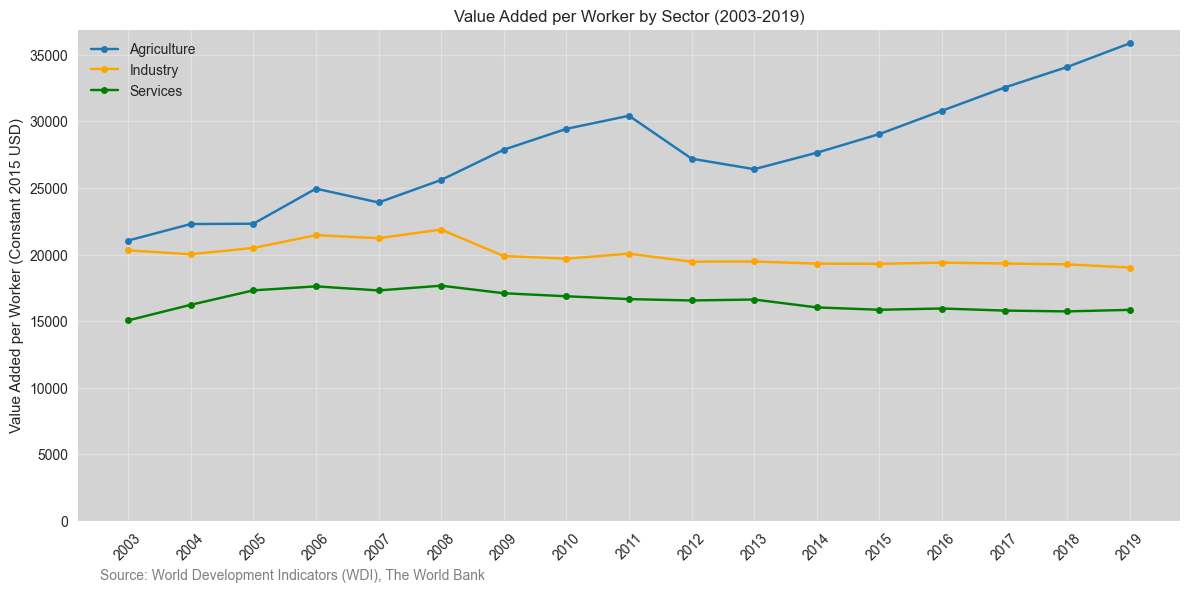

In [19]:
# Worker productivity in different sectors
agriculture_col_prod = 'agriculture__forestry__and_fishing__value_added_per_worker__constant_2015_us____nv_agr_empl_kd'
industry_col_prod = 'industry__including_construction___value_added_per_worker__constant_2015_us____nv_ind_empl_kd'
services_col_prod = 'services__value_added_per_worker__constant_2015_us____nv_srv_empl_kd'


years = list(range(2003, 2020))
data = df_wb.loc[df_wb['year'].isin(years), ['year', agriculture_col_prod, industry_col_prod, services_col_prod]]

plt.figure(figsize=(12, 6))
ax = plt.gca()
ax.set_facecolor('lightgray')

plt.plot(data['year'], data[agriculture_col_prod], label='Agriculture', marker='o', markersize=5, linestyle='-', color='#1f77b4')
plt.plot(data['year'], data[industry_col_prod], label='Industry', marker='o', markersize=5, linestyle='-', color='orange')
plt.plot(data['year'], data[services_col_prod], label='Services', marker='o', markersize=5, linestyle='-', color='green')

plt.xlabel('')
plt.ylabel('Value Added per Worker (Constant 2015 USD)')
plt.title('Value Added per Worker by Sector (2003-2019)')

plt.legend()

plt.xticks(years, rotation=45)


plt.ylim(0, max(data[agriculture_col_prod].max(), data[industry_col_prod].max(), data[services_col_prod].max()) + 1000)

source_text = 'Source: World Development Indicators (WDI), The World Bank'
plt.text(0.02, -0.12, source_text, transform=plt.gca().transAxes, fontsize=10, color='gray')
ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()


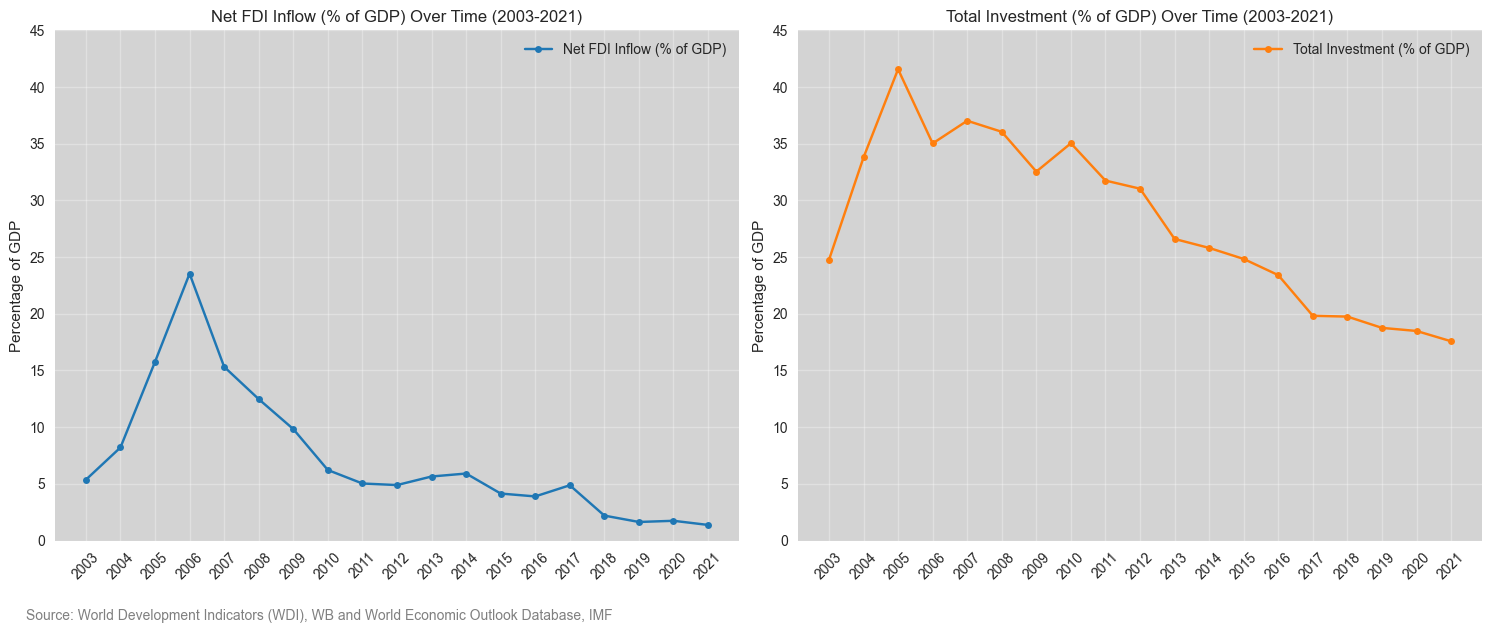

In [20]:


# Net FDI and total investment % of GDP
fdi_col = 'foreign_direct_investment__net_inflows__%_of_gdp___bx_klt_dinv_wd_gd_zs'
investment_col = 'total_investment_share_gdp'

years = list(range(2003, 2022))
data_fdi = df_wb.loc[df_wb['year'].isin(years), ['year', fdi_col]].dropna()
data_investment = df_imf.loc[df_imf['year'].isin(years), ['year', investment_col]].dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.set_facecolor('lightgray')
ax2.set_facecolor('lightgray')

ax1.plot(data_fdi['year'], data_fdi[fdi_col], label='Net FDI Inflow (% of GDP)', marker='o', markersize=5, linestyle='-', color='tab:blue')
ax1.set_xlabel('')
ax1.set_ylabel('Percentage of GDP')
ax1.set_title('Net FDI Inflow (% of GDP) Over Time (2003-2021)')
ax1.legend()
ax1.grid(alpha=0.3)
ax1.set_xticks(years)
ax1.tick_params(axis='x', rotation=45)
ax1.set_ylim(0, 45) 

ax2.plot(data_investment['year'], data_investment[investment_col], label='Total Investment (% of GDP)', marker='o', markersize=5, linestyle='-', color='tab:orange')
ax2.set_xlabel('')
ax2.set_ylabel('Percentage of GDP')
ax2.set_title('Total Investment (% of GDP) Over Time (2003-2021)')
ax2.legend()
ax2.grid(alpha=0.3)
ax2.set_xticks(years)
ax2.tick_params(axis='x', rotation=45)
ax2.set_ylim(0, 45) 

source_text = 'Source: World Development Indicators (WDI), WB and World Economic Outlook Database, IMF'
fig.text(0.02, -0.04, source_text, fontsize=10, color='gray', ha='left')  # Reduce the value of -0.04 to move the source text up

plt.tight_layout(pad=1.0)  
plt.show()


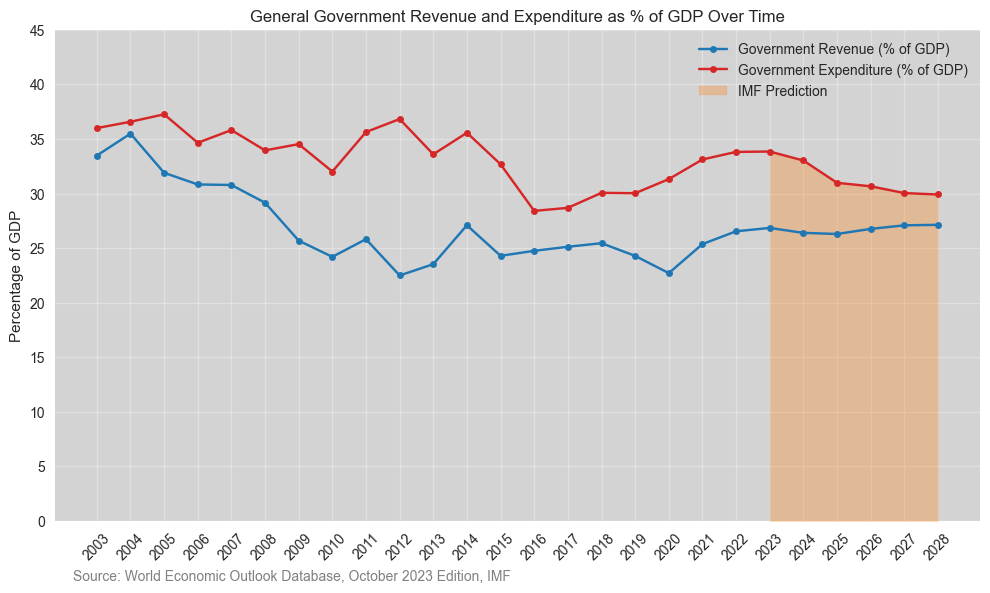

In [21]:
# Gov't Revenues and Expenditures
revenue_col = 'general_government_revenue_percent_of_gdp'
expenditure_col = 'general_government_total_expenditure_percent_of_gdp'

years = df_imf['year']
revenue_data = df_imf[revenue_col]
expenditure_data = df_imf[expenditure_col]


fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('lightgray')


predicted_years = (years >= 2023) & (years <= 2028)


ax.plot(years, revenue_data, label='Government Revenue (% of GDP)', marker='o', markersize=5, linestyle='-', color='tab:blue')
ax.plot(years, expenditure_data, label='Government Expenditure (% of GDP)', marker='o', markersize=5, linestyle='-', color='tab:red')


ax.fill_between(years, 0, expenditure_data, where=predicted_years, color='tab:orange', alpha=0.3, label='IMF Prediction')


ax.set_xlabel('')
ax.set_ylabel('Percentage of GDP')
ax.set_title('General Government Revenue and Expenditure as % of GDP Over Time')
ax.set_xticks(years[::1])


ax.legend()


plt.xticks(rotation=45)

source_text = 'Source: World Economic Outlook Database, October 2023 Edition, IMF'
plt.text(0.02, -0.12, source_text, transform=ax.transAxes, fontsize=10, color='gray')


ax.set_ylim(0, 45)

plt.grid(alpha=0.3)


plt.tight_layout()
plt.show()


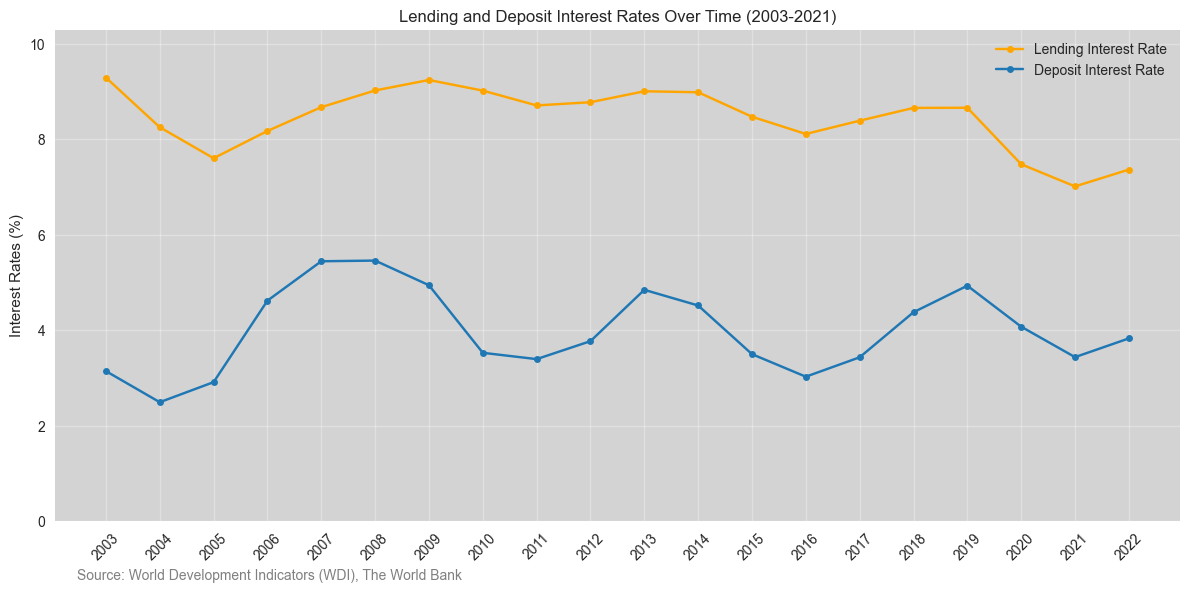

In [22]:
# Landing and deposit interest rates
lending_interest_rate_col = 'lending_interest_rate__%___fr_inr_lend'
deposit_interest_rate_col = 'deposit_interest_rate__%___fr_inr_dpst'

years = list(range(2003, 2023))

data = df_wb.loc[df_wb['year'].isin(years), ['year', lending_interest_rate_col, deposit_interest_rate_col]]


plt.figure(figsize=(12, 6))
ax = plt.gca()
ax.set_facecolor('lightgray')

plt.plot(data['year'], data[lending_interest_rate_col], label='Lending Interest Rate', marker='o', markersize=5, linestyle='-', color='orange')
plt.plot(data['year'], data[deposit_interest_rate_col], label='Deposit Interest Rate', marker='o', markersize=5, linestyle='-', color='tab:blue')

plt.xlabel('')
plt.ylabel('Interest Rates (%)')
plt.title('Lending and Deposit Interest Rates Over Time (2003-2021)')

plt.legend()


plt.xticks(years, rotation=45)


plt.ylim(0, max(data[lending_interest_rate_col].max(), data[deposit_interest_rate_col].max()) + 1)

source_text = 'Source: World Development Indicators (WDI), The World Bank'
plt.text(0.02, -0.12, source_text, transform=ax.transAxes, fontsize=10, color='gray')


ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()


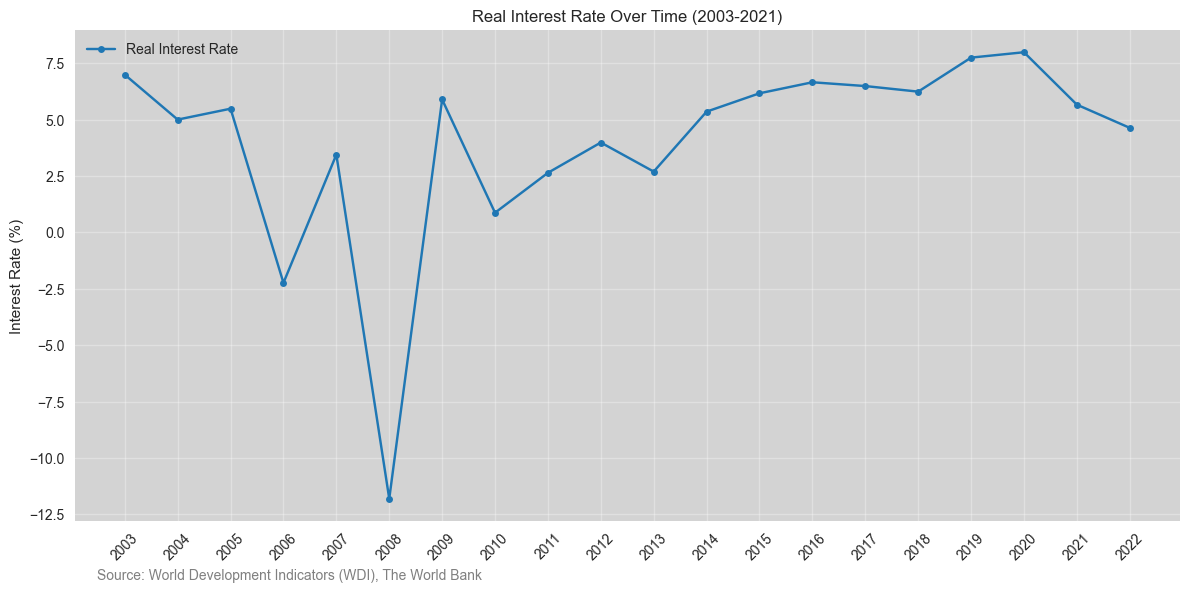

In [23]:
# Real interest rate
real_interest_rate_col = 'real_interest_rate__%___fr_inr_rinr'


years = list(range(2003, 2023))

data = df_wb.loc[df_wb['year'].isin(years), ['year', real_interest_rate_col]]

plt.figure(figsize=(12, 6))
ax = plt.gca()
ax.set_facecolor('lightgray')



plt.plot(data['year'], data[real_interest_rate_col], label='Real Interest Rate', marker='o', markersize=5, linestyle='-', color='tab:blue')

plt.xlabel('')
plt.ylabel('Interest Rate (%)')
plt.title('Real Interest Rate Over Time (2003-2021)')


plt.legend()


plt.xticks(years, rotation=45)


ax2.set_ylim(-13, 9) 


source_text = 'Source: World Development Indicators (WDI), The World Bank'
plt.text(0.02, -0.12, source_text, transform=ax.transAxes, fontsize=10, color='gray')


ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()


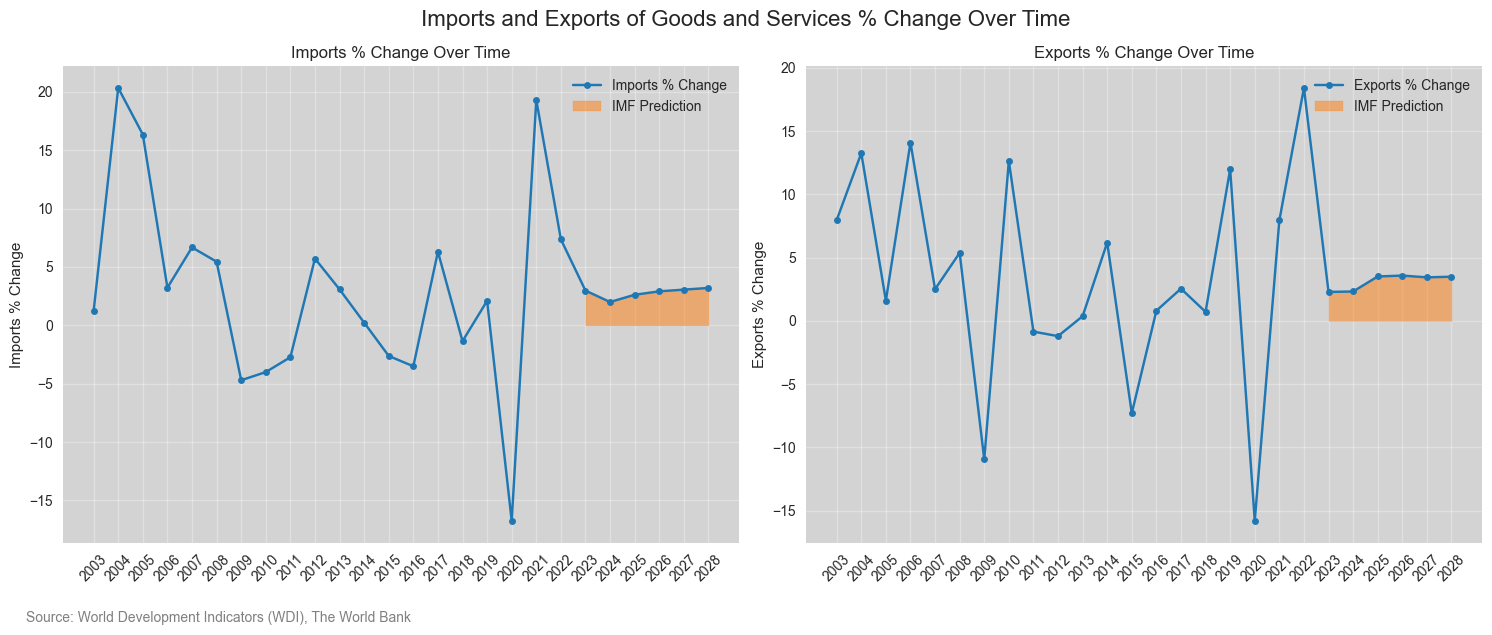

In [24]:
# Export and Import
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
fig.subplots_adjust(wspace=0.3) 

ax1.set_facecolor('lightgray')
ax2.set_facecolor('lightgray')

years = df_imf['year']
prediction_years = (years >= 2023) & (years <= 2028)

imports_col = 'imports_good_ and_services_percent_change'
ax1.plot(years, df_imf[imports_col], label='Imports % Change', marker='o', markersize=5, linestyle='-', color='tab:blue')
ax1.fill_between(years, df_imf[imports_col], where=prediction_years, color='tab:orange', alpha=0.5, label='IMF Prediction')
ax1.set_xlabel('')
ax1.set_ylabel('Imports % Change')
ax1.set_title('Imports % Change Over Time')
ax1.legend()
ax1.grid(alpha=0.3)
ax1.set_xticks(years[::1])
plt.sca(ax1)  
plt.xticks(rotation=45)


exports_col = 'exports_goods_and_services_percent_change'
ax2.plot(years, df_imf[exports_col], label='Exports % Change', marker='o', markersize=5, linestyle='-', color='tab:blue')
ax2.fill_between(years, df_imf[exports_col], where=prediction_years, color='tab:orange', alpha=0.5, label='IMF Prediction')
ax2.set_xlabel('')
ax2.set_ylabel('Exports % Change')
ax2.set_title('Exports % Change Over Time')
ax2.legend()
ax2.grid(alpha=0.3)
ax2.set_xticks(years[::1])
plt.sca(ax2)  
plt.xticks(rotation=45)

plt.suptitle('Imports and Exports of Goods and Services % Change Over Time', fontsize=16)
fig.text(0.02, -0.04, source_text, fontsize=10, color='gray', ha='left')  

plt.tight_layout(pad=1.0)  
plt.show()


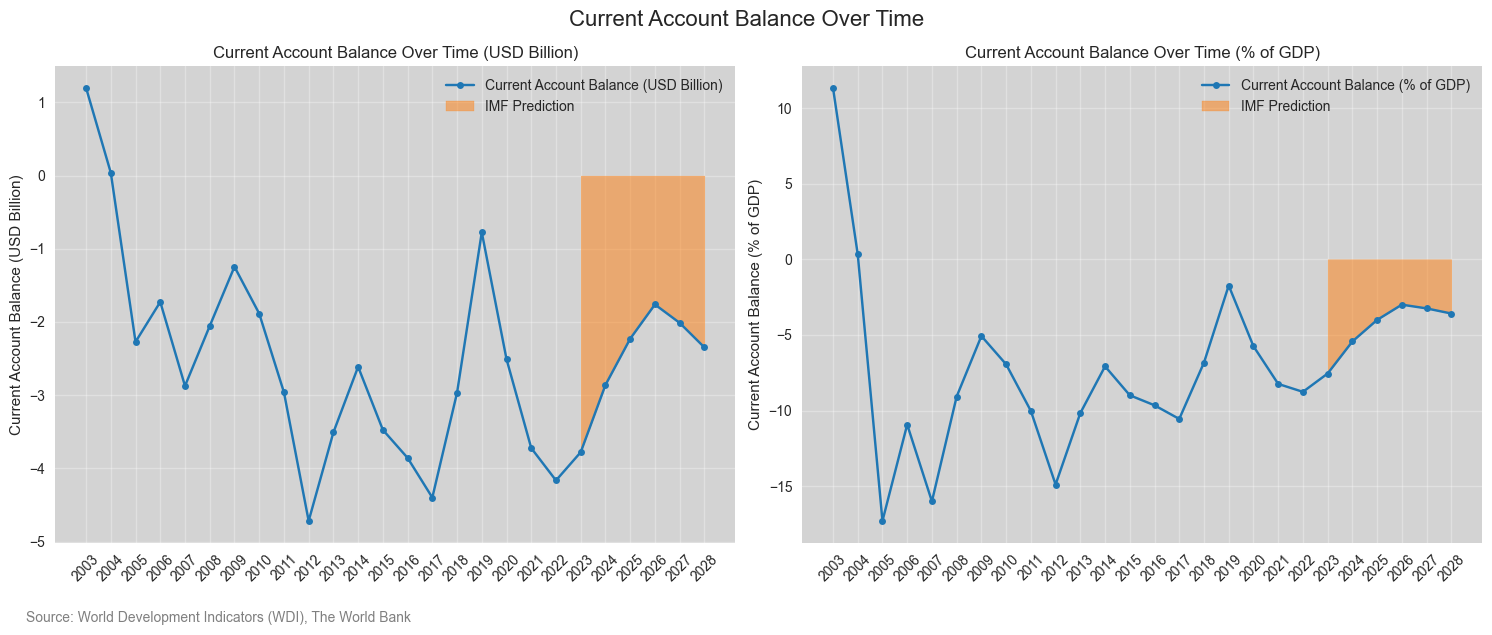

In [25]:
# Current Account
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
fig.subplots_adjust(wspace=0.3)  

ax1.set_facecolor('lightgray')
ax2.set_facecolor('lightgray')


years = df_imf['year']
prediction_years = (years >= 2023) & (years <= 2028)

usd_bln_col = 'current_account_balance_usd_bln'
ax1.plot(years, df_imf[usd_bln_col], label='Current Account Balance (USD Billion)', marker='o', markersize=5, linestyle='-', color='tab:blue')
ax1.fill_between(years, df_imf[usd_bln_col], where=prediction_years, color='tab:orange', alpha=0.5, label='IMF Prediction')
ax1.set_xlabel('')
ax1.set_ylabel('Current Account Balance (USD Billion)')
ax1.set_title('Current Account Balance Over Time (USD Billion)')
ax1.legend()
ax1.grid(alpha=0.3)
ax1.set_xticks(years[::1])
plt.sca(ax1)  
plt.xticks(rotation=45)


percent_of_gdp_col = 'current_account_balance_percent_of_gdp'
ax2.plot(years, df_imf[percent_of_gdp_col], label='Current Account Balance (% of GDP)', marker='o', markersize=5, linestyle='-', color='tab:blue')
ax2.fill_between(years, df_imf[percent_of_gdp_col], where=prediction_years, color='tab:orange', alpha=0.5, label='IMF Prediction')
ax2.set_xlabel('')
ax2.set_ylabel('Current Account Balance (% of GDP)')
ax2.set_title('Current Account Balance Over Time (% of GDP)')
ax2.legend()
ax2.grid(alpha=0.3)
ax2.set_xticks(years[::1])
plt.sca(ax2)  
plt.xticks(rotation=45)


plt.suptitle('Current Account Balance Over Time', fontsize=16)

fig.text(0.02, -0.04, source_text, fontsize=10, color='gray', ha='left')  # Reduce the value of -0.04 to move the source text up

plt.tight_layout(pad=1.0)  
plt.show()


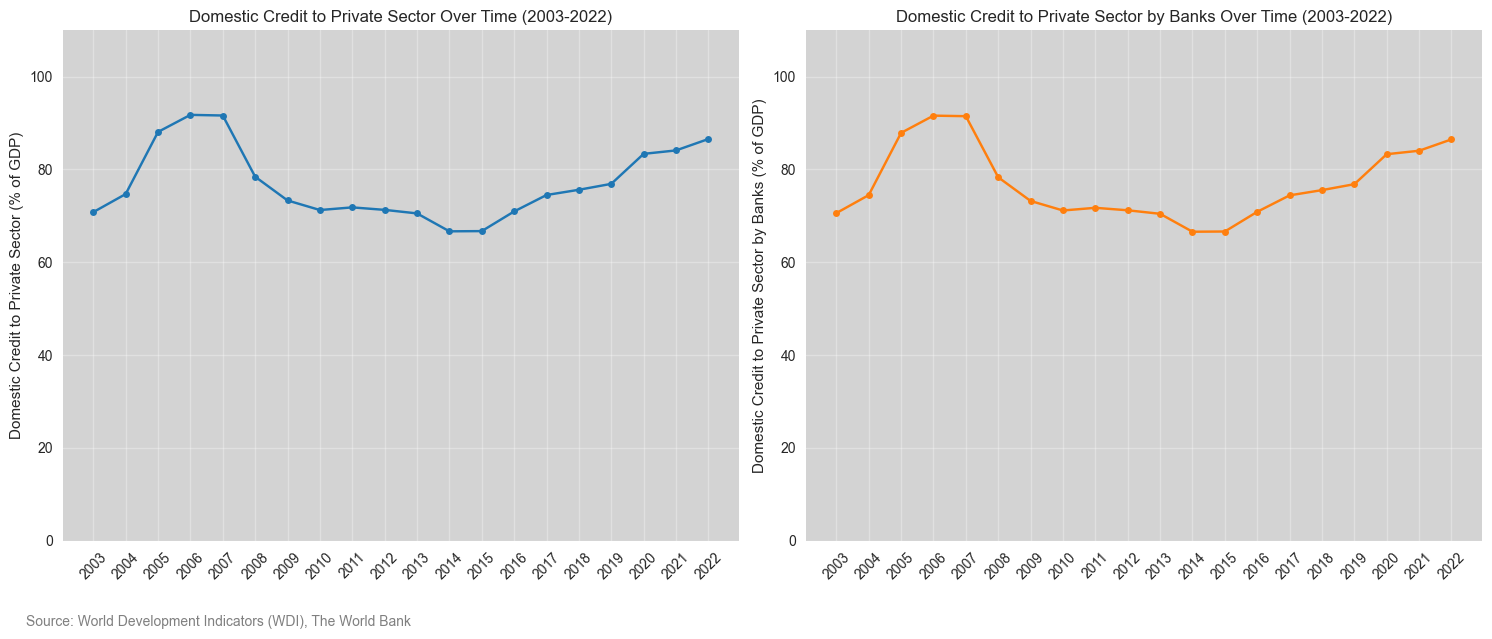

In [26]:

credit_to_private_sector_col = 'domestic_credit_to_private_sector__%_of_gdp___fs_ast_prvt_gd_zs'
credit_to_private_sector_banks_col = 'domestic_credit_to_private_sector_by_banks__%_of_gdp___fd_ast_prvt_gd_zs'

years = list(range(2003, 2023))
data_credit_to_private_sector = df_wb.loc[df_wb['year'].isin(years), ['year', credit_to_private_sector_col]]
data_credit_to_private_sector_banks = df_wb.loc[df_wb['year'].isin(years), ['year', credit_to_private_sector_banks_col]]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
fig.subplots_adjust(wspace=0.3)

ax1.set_facecolor('lightgray')
ax2.set_facecolor('lightgray')

ax1.plot(data_credit_to_private_sector['year'], data_credit_to_private_sector[credit_to_private_sector_col], marker='o', markersize=5, linestyle='-', color='tab:blue')
ax1.set_ylabel('Domestic Credit to Private Sector (% of GDP)')
ax1.set_title('Domestic Credit to Private Sector Over Time (2003-2022)')
ax1.grid(alpha=0.3)
ax1.set_xticks(years)
ax1.tick_params(axis='x', rotation=45)
ax1.set_ylim(0, 110)  

ax2.plot(data_credit_to_private_sector_banks['year'], data_credit_to_private_sector_banks[credit_to_private_sector_banks_col], marker='o', markersize=5, linestyle='-', color='tab:orange')
ax2.set_ylabel('Domestic Credit to Private Sector by Banks (% of GDP)')
ax2.set_title('Domestic Credit to Private Sector by Banks Over Time (2003-2022)')
ax2.grid(alpha=0.3)
ax2.set_xticks(years)
ax2.tick_params(axis='x', rotation=45)
ax2.set_ylim(0, 110)  

source_text = 'Source: World Development Indicators (WDI), The World Bank'
fig.text(0.02, -0.05, source_text, fontsize=10, color='gray')

plt.tight_layout(pad=1.0) 
plt.show()


# Business Climate Overview

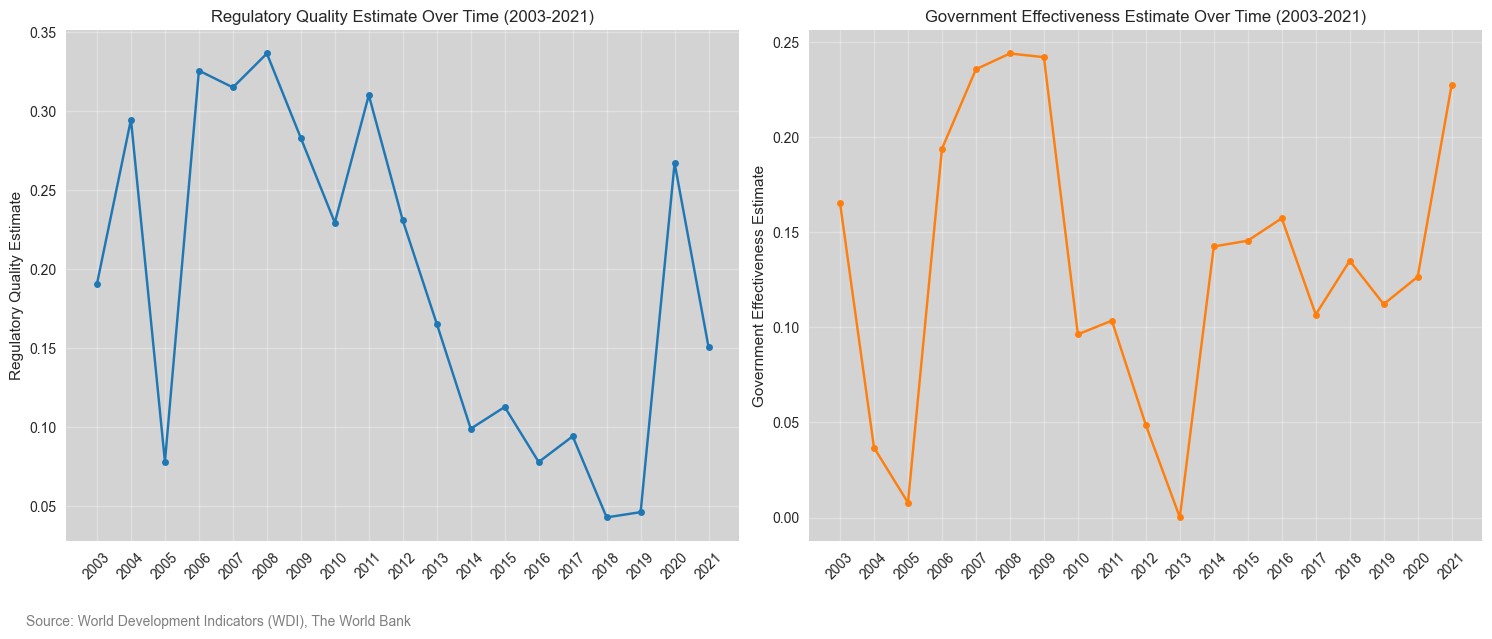

In [27]:
# Governmet effectivness and regulatory quality
regulatory_quality_col = 'regulatory_quality__estimate__rq_est'
government_effectiveness_col = 'government_effectiveness__estimate__ge_est'

years = list(range(2003, 2022))
data_regulatory_quality = df_wb.loc[df_wb['year'].isin(years), ['year', regulatory_quality_col]]
data_government_effectiveness = df_wb.loc[df_wb['year'].isin(years), ['year', government_effectiveness_col]]


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
fig.subplots_adjust(wspace=0.3)

ax1.set_facecolor('lightgray')
ax2.set_facecolor('lightgray')


ax1.plot(data_regulatory_quality['year'], data_regulatory_quality[regulatory_quality_col], marker='o', markersize=5, linestyle='-', color='tab:blue')
ax1.set_ylabel('Regulatory Quality Estimate')
ax1.set_title('Regulatory Quality Estimate Over Time (2003-2021)')
ax1.grid(alpha=0.3)
ax1.set_xticks(years)
ax1.tick_params(axis='x', rotation=45)


ax2.plot(data_government_effectiveness['year'], data_government_effectiveness[government_effectiveness_col], marker='o', markersize=5, linestyle='-', color='tab:orange')
ax2.set_ylabel('Government Effectiveness Estimate')
ax2.set_title('Government Effectiveness Estimate Over Time (2003-2021)')
ax2.grid(alpha=0.3)
ax2.set_xticks(years)
ax2.tick_params(axis='x', rotation=45)


source_text = 'Source: World Development Indicators (WDI), The World Bank'
fig.text(0.02, -0.05, source_text, fontsize=10, color='gray')

plt.tight_layout(pad=1.0)
plt.show()


Government Effectiveness captures perceptions of the quality of public services, the quality of the civil service and the degree of its independence from political pressures, the quality of policy formulation and implementation, and the credibility of the government's commitment to such policies. Estimate gives the country's score on the aggregate indicator, in units of a standard normal distribution, i.e. ranging from approximately -2.5 (weak) to 2.5 (strong).

Regulatory Quality captures perceptions of the ability of the government to formulate and implement sound policies and regulations that permit and promote private sector development. Estimate gives the country's score on the aggregate indicator, in units of a standard normal distribution, i.e. ranging from approximately -2.5 (weak) to 2.5 (strong).

Control of Corruption captures perceptions of the extent to which public power is exercised for private gain, including both petty and grand forms of corruption, as well as "capture" of the state by elites and private interests. Estimate gives the country's score on the aggregate indicator, in units of a standard normal distribution, i.e. ranging from approximately -2.5 (weak) to 2.5 (strong).

Rule of Law captures perceptions of the extent to which agents have confidence in and abide by the rules of society, and in particular the quality of contract enforcement, property rights, the police, and the courts, as well as the likelihood of crime and violence. Estimate gives the country's score on the aggregate indicator, in units of a standard normal distribution, i.e. ranging from approximately -2.5 (weak) to 2.5 (strong).

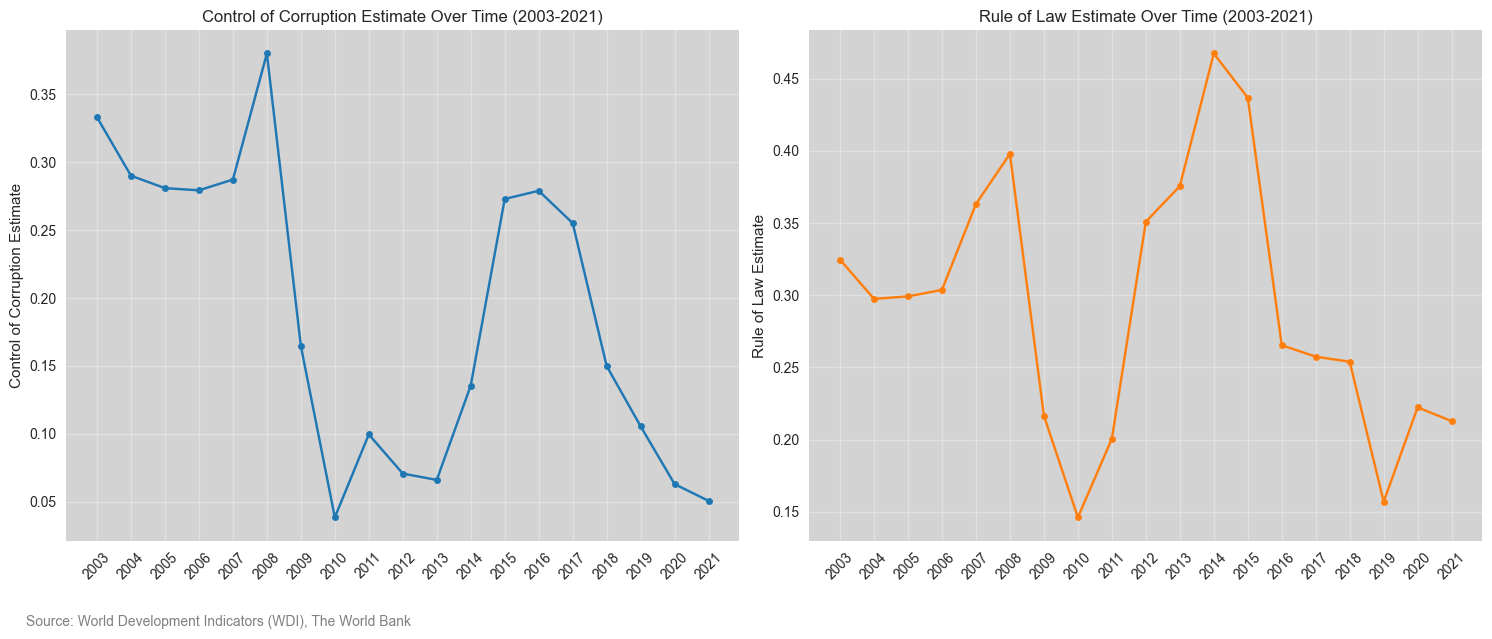

In [28]:
# Corruption and rule of law
corruption_control_col = 'control_of_corruption__estimate__cc_est'
rule_of_law_col = 'rule_of_law__estimate__rl_est'

years = list(range(2003, 2022))
data_corruption_control = df_wb.loc[df_wb['year'].isin(years), ['year', corruption_control_col]]
data_rule_of_law = df_wb.loc[df_wb['year'].isin(years), ['year', rule_of_law_col]]


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
fig.subplots_adjust(wspace=0.3)

ax1.set_facecolor('lightgray')
ax2.set_facecolor('lightgray')

ax1.plot(data_corruption_control['year'], data_corruption_control[corruption_control_col], marker='o', markersize=5, linestyle='-', color='tab:blue')
ax1.set_ylabel('Control of Corruption Estimate')
ax1.set_title('Control of Corruption Estimate Over Time (2003-2021)')
ax1.grid(alpha=0.3)
ax1.set_xticks(years)
ax1.tick_params(axis='x', rotation=45)

ax2.plot(data_rule_of_law['year'], data_rule_of_law[rule_of_law_col], marker='o', markersize=5, linestyle='-', color='tab:orange')
ax2.set_ylabel('Rule of Law Estimate')
ax2.set_title('Rule of Law Estimate Over Time (2003-2021)')
ax2.grid(alpha=0.3)
ax2.set_xticks(years)
ax2.tick_params(axis='x', rotation=45)

source_text = 'Source: World Development Indicators (WDI), The World Bank'
fig.text(0.02, -0.05, source_text, fontsize=10, color='gray')


plt.tight_layout(pad=1.0)
plt.show()


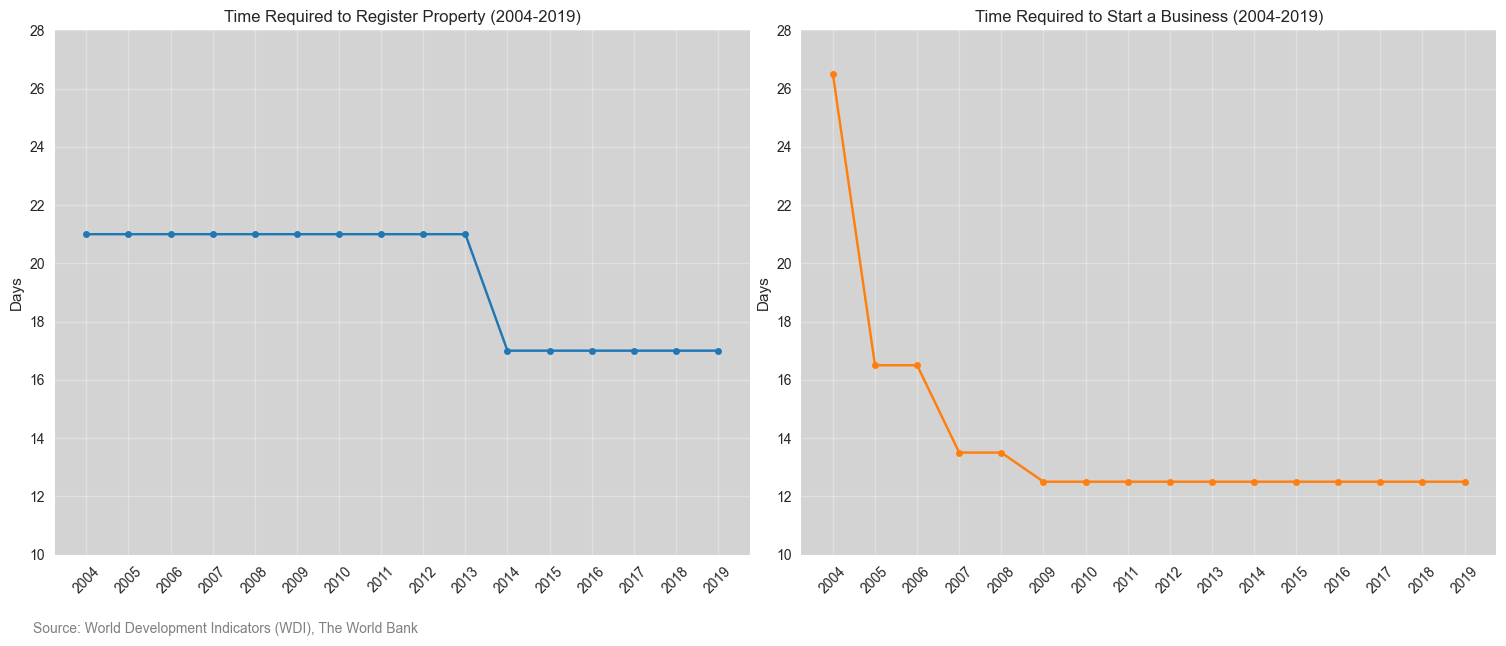

In [29]:
# Days required to start business and register property
years = list(range(2004, 2020))
data = df_wb.loc[df_wb['year'].isin(years), ['year', 'time_required_to_register_property__days___ic_prp_durs', 'time_required_to_start_a_business__days___ic_reg_durs']]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.set_facecolor('lightgray')
ax2.set_facecolor('lightgray')

ax1.plot(data['year'], data['time_required_to_register_property__days___ic_prp_durs'], marker='o', markersize=5, linestyle='-', color='tab:blue')
ax1.set_xlabel('')
ax1.set_ylabel('Days')
ax1.set_title('Time Required to Register Property (2004-2019)')
ax1.grid(alpha=0.3)
ax1.set_xticks(years)
ax1.tick_params(axis='x', rotation=45)
ax1.set_yticks(range(10, 29, 2))

ax2.plot(data['year'], data['time_required_to_start_a_business__days___ic_reg_durs'], marker='o', markersize=5, linestyle='-', color='tab:orange')
ax2.set_xlabel('')
ax2.set_ylabel('Days')
ax2.set_title('Time Required to Start a Business (2004-2019)')
ax2.grid(alpha=0.3)
ax2.set_xticks(years)
ax2.tick_params(axis='x', rotation=45)
ax2.set_yticks(range(10, 29, 2))

source_text = 'Source: World Development Indicators (WDI), The World Bank'
fig.text(0.02, -0.05, source_text, fontsize=10, color='gray', ha='left')  

plt.tight_layout(pad=0.5)  
plt.show()

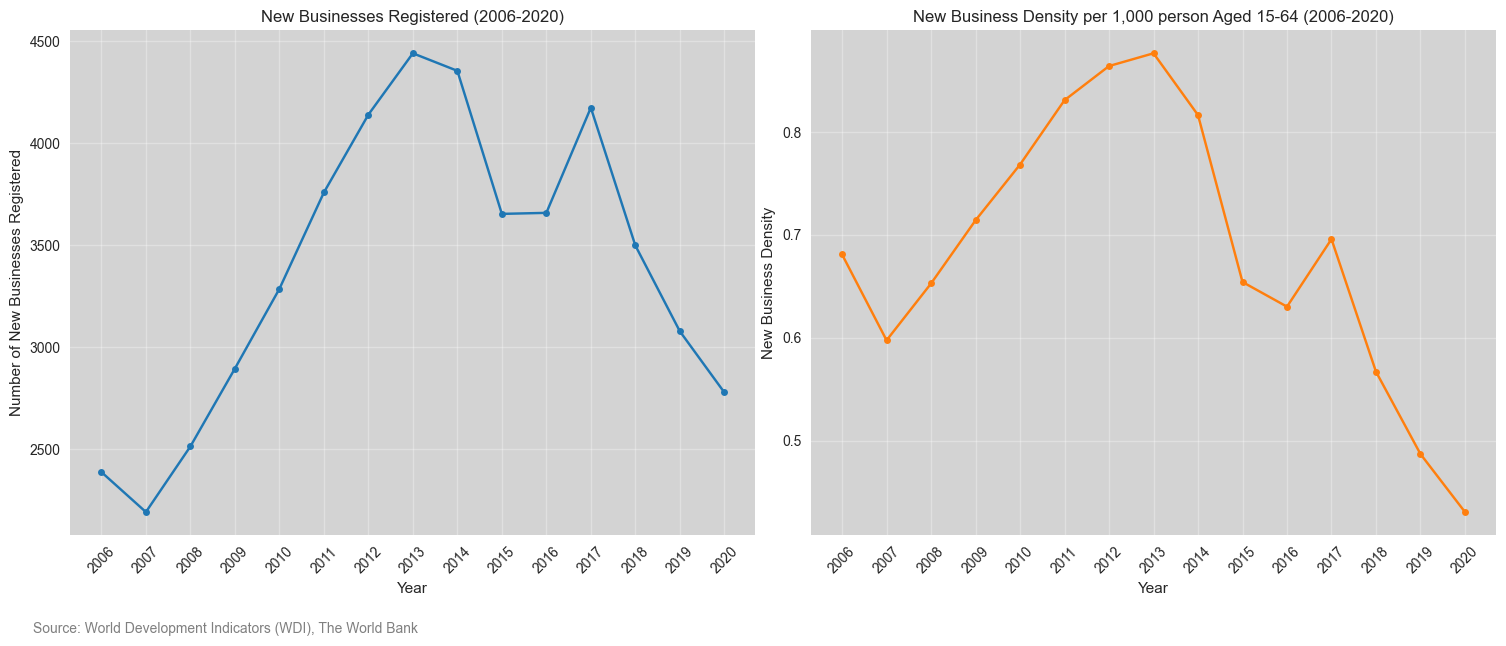

In [30]:
# New Business Registry Data
years = list(range(2006, 2021))
data = df_wb.loc[df_wb['year'].isin(years), ['year', 'new_businesses_registered__number___ic_bus_nreg', 'new_business_density__new_registrations_per_1_000_people_ages_15_64___ic_bus_ndns_zs']]


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))


ax1.set_facecolor('lightgray')
ax2.set_facecolor('lightgray')


ax1.plot(data['year'], data['new_businesses_registered__number___ic_bus_nreg'], marker='o', markersize=5, linestyle='-', color='tab:blue')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of New Businesses Registered')
ax1.set_title('New Businesses Registered (2006-2020)')
ax1.grid(alpha=0.3)
ax1.set_xticks(years)
ax1.tick_params(axis='x', rotation=45)

ax2.plot(data['year'], data['new_business_density__new_registrations_per_1_000_people_ages_15_64___ic_bus_ndns_zs'], marker='o', markersize=5, linestyle='-', color='tab:orange')
ax2.set_xlabel('Year')
ax2.set_ylabel('New Business Density')
ax2.set_title('New Business Density per 1,000 person Aged 15-64 (2006-2020)')
ax2.grid(alpha=0.3)
ax2.set_xticks(years)
ax2.tick_params(axis='x', rotation=45)


source_text = 'Source: World Development Indicators (WDI), The World Bank'
fig.text(0.02, -0.05, source_text, fontsize=10, color='gray', ha='left')  

plt.tight_layout(pad=0.5)

plt.show()


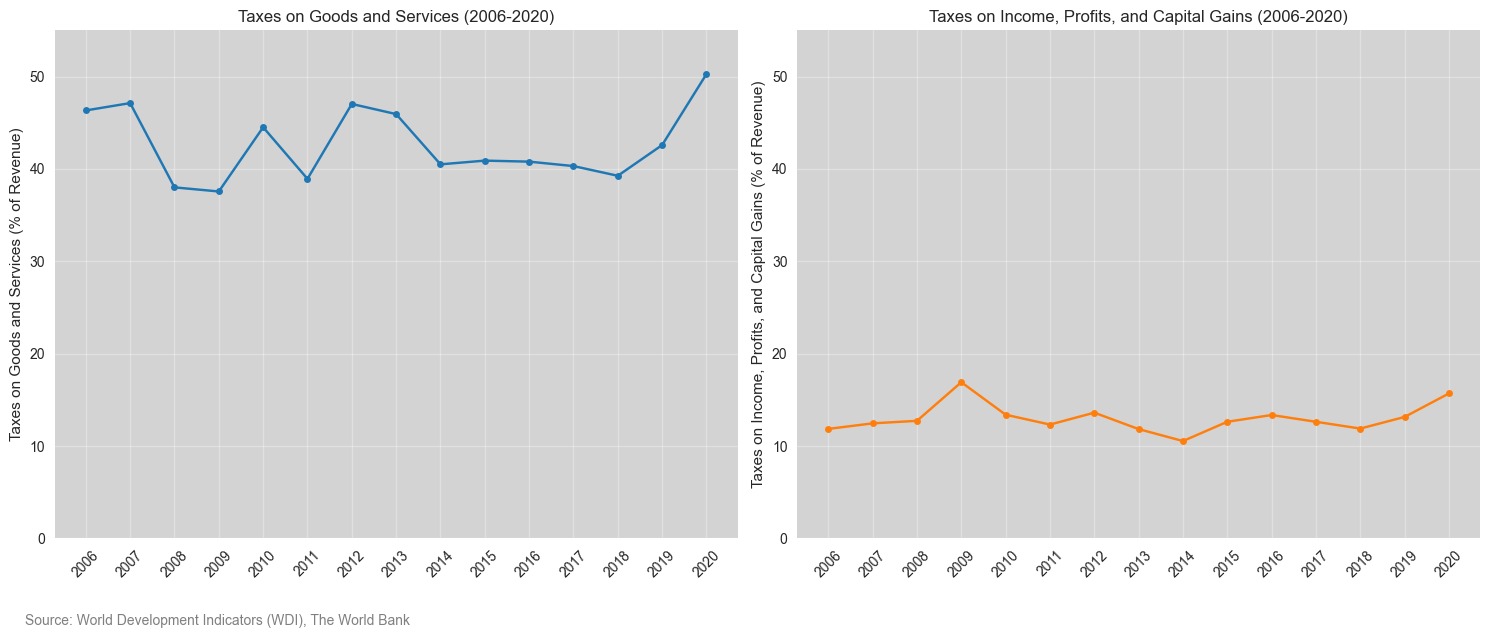

In [31]:
years = list(range(2006, 2021))
data = df_wb.loc[df_wb['year'].isin(years), ['year', 'taxes_on_goods_and_services__%_of_revenue___gc_tax_gsrv_rv_zs', 'taxes_on_income__profits_and_capital_gains__%_of_revenue___gc_tax_ypkg_rv_zs']]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))


ax1.set_facecolor('lightgray')
ax2.set_facecolor('lightgray')


ax1.plot(data['year'], data['taxes_on_goods_and_services__%_of_revenue___gc_tax_gsrv_rv_zs'], marker='o', markersize=5, linestyle='-', color='tab:blue')
ax1.set_xlabel('')
ax1.set_ylabel('Taxes on Goods and Services (% of Revenue)')
ax1.set_title('Taxes on Goods and Services (2006-2020)')
ax1.grid(alpha=0.3)
ax1.set_xticks(years)
ax1.tick_params(axis='x', rotation=45)
ax1.set_ylim(0, 55)  

ax2.plot(data['year'], data['taxes_on_income__profits_and_capital_gains__%_of_revenue___gc_tax_ypkg_rv_zs'], marker='o', markersize=5, linestyle='-', color='tab:orange')
ax2.set_xlabel('')
ax2.set_ylabel('Taxes on Income, Profits, and Capital Gains (% of Revenue)')
ax2.set_title('Taxes on Income, Profits, and Capital Gains (2006-2020)')
ax2.grid(alpha=0.3)
ax2.set_xticks(years)
ax2.tick_params(axis='x', rotation=45)
ax2.set_ylim(0, 55) 


source_text = 'Source: World Development Indicators (WDI), The World Bank'
fig.text(0.02, -0.05, source_text, fontsize=10, color='gray', ha='left')  
plt.tight_layout()
plt.show()


Taxes on goods and services include general sales and turnover or value added taxes, selective excises on goods, selective taxes on services, taxes on the use of goods or property, taxes on extraction and production of minerals, and profits of fiscal monopolies.

Taxes on income, profits, and capital gains are levied on the actual or presumptive net income of individuals, on the profits of corporations and enterprises, and on capital gains, whether realized or not, on land, securities, and other assets. Intragovernmental payments are eliminated in consolidation.

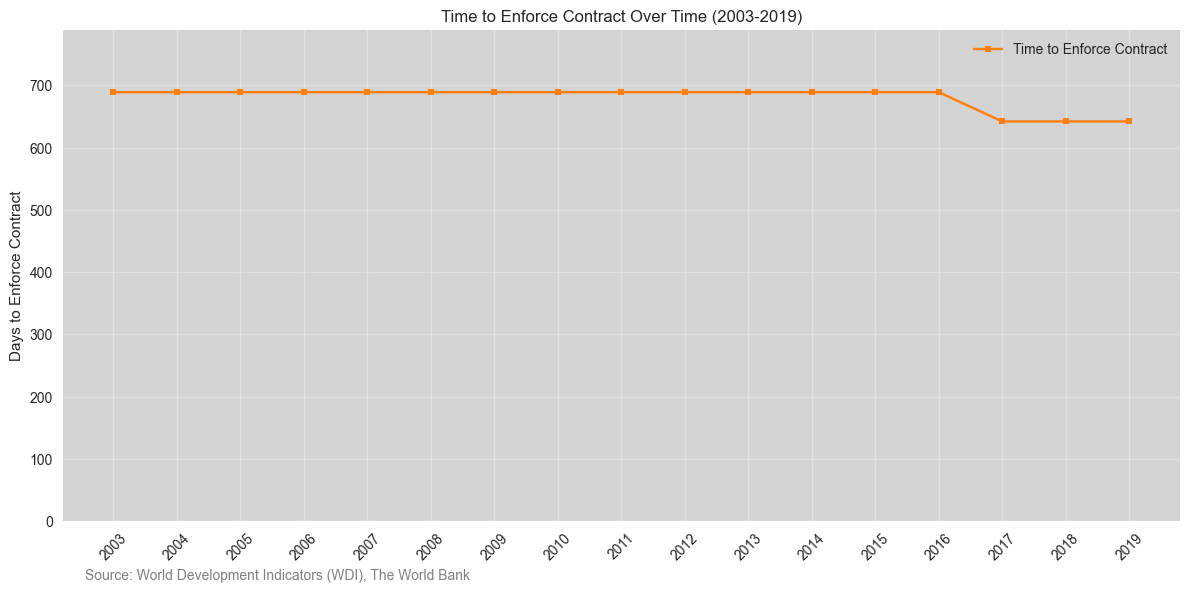

In [33]:
# Contract Enforcement
contract_enforcement_col = 'time_required_to_enforce_a_contract__days___ic_lgl_durs'


df_wb[contract_enforcement_col] = pd.to_numeric(df_wb[contract_enforcement_col], errors='coerce')


df_filtered = df_wb.dropna(subset=[contract_enforcement_col])

years = list(range(2003, 2020))

data = df_filtered.loc[df_filtered['year'].isin(years), ['year', contract_enforcement_col]]

plt.figure(figsize=(12, 6))
ax = plt.gca()
ax.set_facecolor('lightgray')

plt.plot(data['year'], data[contract_enforcement_col], label='Time to Enforce Contract', marker='s', markersize=5, linestyle='-', color='tab:orange')

plt.xlabel('')
plt.ylabel('Days to Enforce Contract')
plt.title('Time to Enforce Contract Over Time (2003-2019)')

plt.legend()

plt.xticks(years, rotation=45)


ax.set_ylim(0, data[contract_enforcement_col].max() + 100)  

source_text = 'Source: World Development Indicators (WDI), The World Bank'
plt.text(0.02, -0.12, source_text, transform=ax.transAxes, fontsize=10, color='gray')

ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

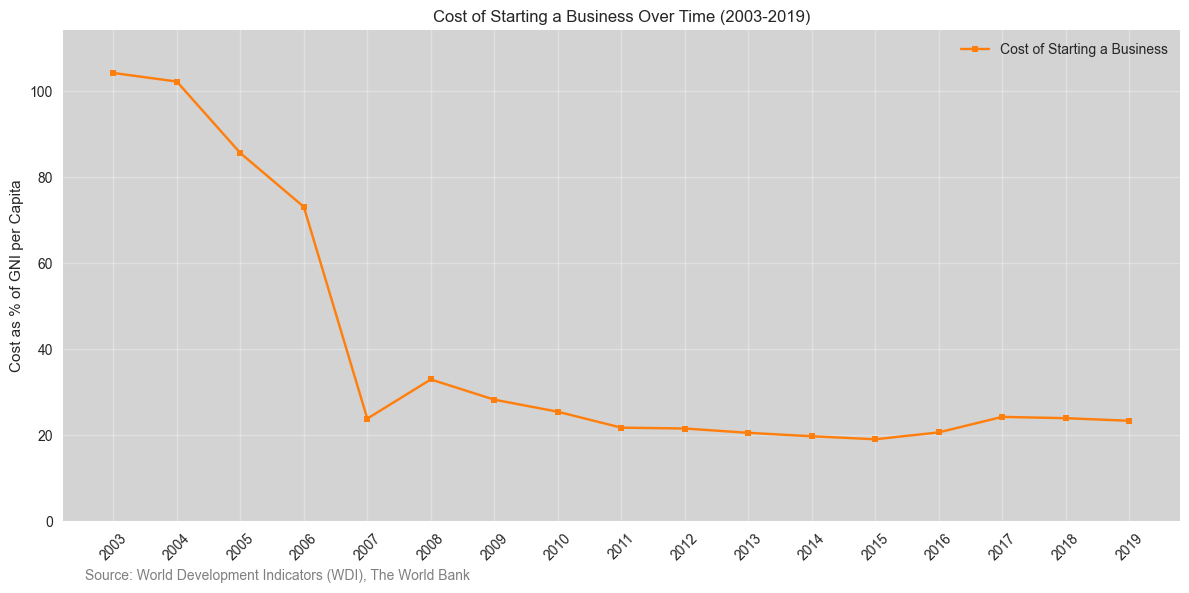

In [34]:
# Costs of starting Business
cost_of_starting_business = 'cost_of_business_start_up_procedures__%_of_gni_per_capita___ic_reg_cost_pc_zs'

df_wb[cost_of_starting_business] = pd.to_numeric(df_wb[cost_of_starting_business], errors='coerce')

df_filtered = df_wb.dropna(subset=[cost_of_starting_business])

years = list(range(2003, 2020))

data = df_filtered.loc[df_filtered['year'].isin(years), ['year', cost_of_starting_business]]

plt.figure(figsize=(12, 6))
ax = plt.gca()
ax.set_facecolor('lightgray')

plt.plot(data['year'], data[cost_of_starting_business], label='Cost of Starting a Business', marker='s', markersize=5, linestyle='-', color='tab:orange')

plt.xlabel('')
plt.ylabel('Cost as % of GNI per Capita')
plt.title('Cost of Starting a Business Over Time (2003-2019)')

plt.legend()

plt.xticks(years, rotation=45)

ax.set_ylim(0, data[cost_of_starting_business].max() + 10)  

source_text = 'Source: World Development Indicators (WDI), The World Bank'
plt.text(0.02, -0.12, source_text, transform=ax.transAxes, fontsize=10, color='gray')

ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()